# Peer Review Assignment 2 - Part II

Name: Lim Si Jie

Date: 08/05/2020


## Instructions

* Work through the notebook, answer all questions, and do all problems
* You are allowed to consult the internet, and discuss on the module forum
* Your answers and solutions to the problems should be added to this notebook 
* Submit your final work as an html file
* Note that the solutions to the problems used python version 3.6.4.  

## Marking Scheme (Theoretical Questions)
* All questions are marked out of 3.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 1 mark
* 'Perfect' answer: 3 marks

## Marking Scheme (Practical Problems)
* All problems are marked out of 5.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 2 mark
* Working code: 5 marks
---


## Mount Google Drive to VM

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

# Linear Discriminant Analysis (LDA)

The PCA encountered in the previous exercise can be viewed as a dimensionality reduction scheme, projecting onto the directions with maximal variance.

LDA is also a dimensionality reduction scheme but operates on a very different principle. Now we are given data that belongs to different classes. We are given both the data value $x$ and a class label $y$ If we have $k$ classes then $y$ will take on $k$ labels, in Python typicall the values 0 through $k-1$. 

The idea is to project the data onto a lower dimensional space in such a way that maximal *class separation* is achieved in the lower dimensional space.

You can learn more about the scikit-learn implementation at http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

You will investigate the difference between  PCA using the wine data set, for more information see  http://archive.ics.uci.edu/ml/datasets/Wine Since the wine dataset is 13 dimensional the difference between PCA and LDA is more pronounced than say, with the Iris data set. 

We project down to 2 dimensions for easy visualization. In fact, since there are only 3 classes, one does not retain any more information by using higher dimensions.


## Import packages

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image

## Simple example

As a warmup run the example from the scikit-learn website.

In [4]:
# Create synthetic data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Instantiate & fit the model: LDA
clf = LDA()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


## Loading the data

Read the data, extract the class labels from the last column, then extract the names of the classes using the convenient `set` function in Python. 


In [0]:
root = '/gdrive/My Drive/Colab Notebooks/Study/WQU/ML in Finance/CRT_2/LDA Assignment'

In [0]:
# import training data
wine_train = np.loadtxt(os.path.join(root, 'data/wine/wine_train.txt'),delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt(os.path.join(root, 'data/wine/wine_test.txt'), delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

---

## PCA

### Problem 1: (**5 marks**)

Project the data onto 2 PCA components and display the classes of the dimension-reduced data.

You should see something like:

In [0]:
# Insert code to produce the image below
import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(wine_train)
principalComponents = pca.transform(wine_test)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(wine_test_labels)], axis = 1)

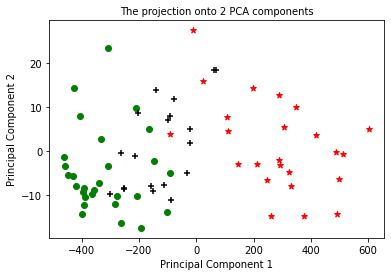

In [8]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('The projection onto 2 PCA components', fontsize = 10)

targets = set(finalDf[0])
markers = ["*", "o", "+"]
colors = ['red', 'green', 'black']

for target, marker, color in zip(targets, markers, colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], \
               finalDf.loc[indicesToKeep, 'principal component 2'], \
               marker=marker, color=color)

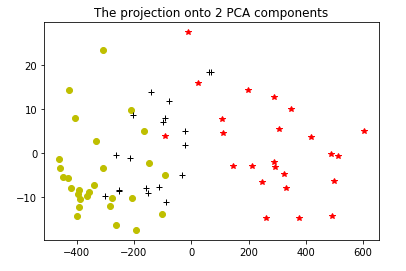

In [9]:
display(Image(filename=os.path.join(root, 'Wine_PCA.png')))

## LDA

### Problem 2:(**5 marks**)

Fit an LDA model to the data, using 2 components and display the different classes of the projected data.

You should see: 

In [0]:
# Insert code to produce the image below

#scaler = StandardScaler()#instantiate
#X_scaled = scaler.fit_transform(wine_train.data)

lda = LDA(n_components = 2)
wine_train_lda = lda.fit_transform(wine_train, wine_train_labels)
wine_test_lda = lda.transform(wine_test)

principalDf = pd.DataFrame(data = wine_test_lda, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(wine_test_labels)], axis = 1)

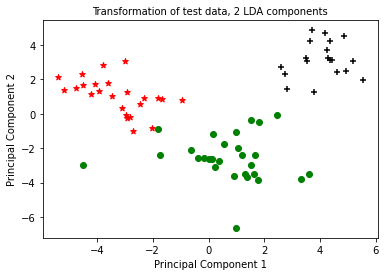

In [11]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Transformation of test data, 2 LDA components', fontsize = 10)

targets = set(finalDf[0])
markers = ["*", "o", "+"]
colors = ['red', 'green', 'black']

for target, marker, color in zip(targets, markers, colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], \
               finalDf.loc[indicesToKeep, 'principal component 2'], \
               marker=marker, color=color)

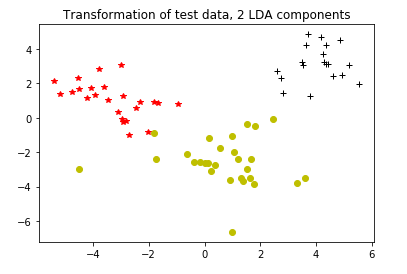

In [12]:
display(Image(filename=os.path.join(root, 'LDA_pr.png')))

There should be no doubt that the LDA projection is much better at preserving the class structure.